In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import NeighborhoodComponentsAnalysis as nca
from sklearn.pipeline import Pipeline as pipe

df = pd.read_csv(r"../../data/class_german_credit.csv", engine="pyarrow")

# Avaliação do dataset

### Tipos de cada atributo

In [80]:
print("Tipos de cada atributo:")
df.dtypes

Tipos de cada atributo:


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [81]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


In [101]:
contagem = df['Risk'].value_counts()
print(contagem)


Risk
good    700
bad     300
Name: count, dtype: int64


In [82]:
print('Estatística básica dos atributos:')
print(df.describe())

Estatística básica dos atributos:
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


### Avaliação de frequência, valor mínimo, máximo e desvio padrão

#### Frequência 

In [83]:
frequencia = df['Sex'].value_counts()
list(frequencia.items())

[('male', 690), ('female', 310)]

In [84]:
frequencia = df['Job'].value_counts()
list(frequencia.items())

[(2, 630), (1, 200), (3, 148), (0, 22)]

In [85]:
frequencia = df['Housing'].value_counts()
list(frequencia.items())

[('own', 713), ('rent', 179), ('free', 108)]

In [86]:
frequencia = df['Saving accounts'].value_counts()
list(frequencia.items())

[('little', 603), ('moderate', 103), ('quite rich', 63), ('rich', 48)]

In [87]:
frequencia = df['Checking account'].value_counts()
list(frequencia.items())

[('little', 274), ('moderate', 269), ('rich', 63)]

In [88]:
frequencia = df['Purpose'].value_counts()
list(frequencia.items())

[('car', 337),
 ('radio/TV', 280),
 ('furniture/equipment', 181),
 ('business', 97),
 ('education', 59),
 ('repairs', 22),
 ('domestic appliances', 12),
 ('vacation/others', 12)]

#### Valor mínimo e máximo 

In [89]:
valmax = df['Age'].max()
valmin = df['Age'].min()
print(f"Valor Máximo: {valmax}\nValor Mínimo: {valmin}")

Valor Máximo: 75
Valor Mínimo: 19


In [90]:
valmax = df['Duration'].max()
valmin = df['Duration'].min()
print(f"Valor Máximo: {valmax}\nValor Mínimo: {valmin}")

Valor Máximo: 72
Valor Mínimo: 4


#### Desvio Padrão

In [91]:
desvio = df["Age"].std()
print(f"Desvio Padrão: {desvio:.2f}")

Desvio Padrão: 11.38


In [92]:
desvio = df['Credit amount'].std()
print(f"Desvio Padrão: {desvio:.2f}")

#testar clusterizar esses caras

Desvio Padrão: 2822.74


In [93]:
desvio = df["Duration"].std()
print(f"Desvio Padrão: {desvio:.2f}")

Desvio Padrão: 12.06


### Avaliação de Outliers

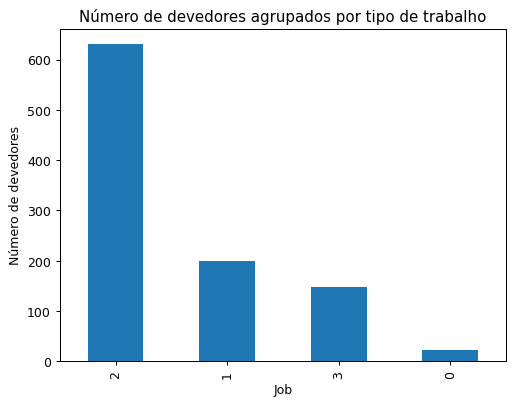

In [94]:
df_topSpecies = df['Job'].groupby(df['Job']).count().sort_values(ascending=False) 
fig = plt.figure(dpi=90)
df_topSpecies.plot.bar()

plt.title('Número de devedores agrupados por tipo de trabalho')
plt.xlabel('Job')
plt.ylabel('Número de devedores')
plt.show()

#testar remover tipo de trabalho 0 

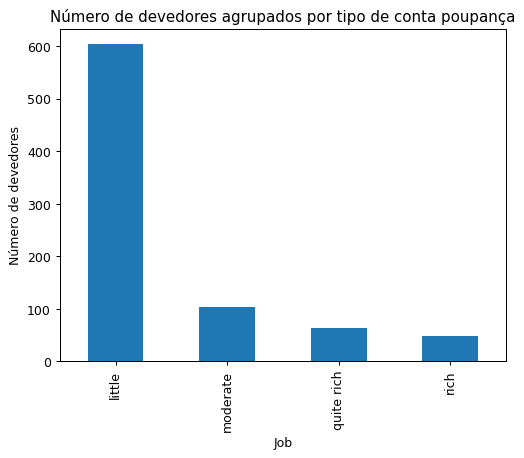

In [95]:
df_topSpecies = df['Saving accounts'].groupby(df['Saving accounts']).count().sort_values(ascending=False) 
fig = plt.figure(dpi=90)
df_topSpecies.plot.bar()

plt.title('Número de devedores agrupados por tipo de conta poupança')
plt.xlabel('Job')
plt.ylabel('Número de devedores')
plt.show()

#testar juntar rich com quite rich

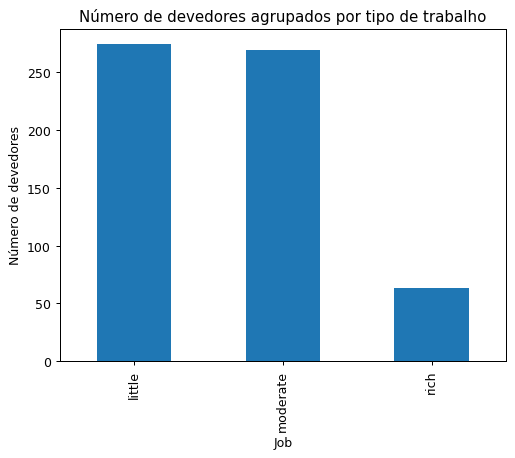

In [96]:
df_topSpecies = df['Checking account'].groupby(df['Checking account']).count().sort_values(ascending=False) 
fig = plt.figure(dpi=90)
df_topSpecies.plot.bar()

plt.title('Número de devedores agrupados por tipo de trabalho')
plt.xlabel('Job')
plt.ylabel('Número de devedores')
plt.show()

#testar colocar essa coluna, mesmo com o alto numero de NAs


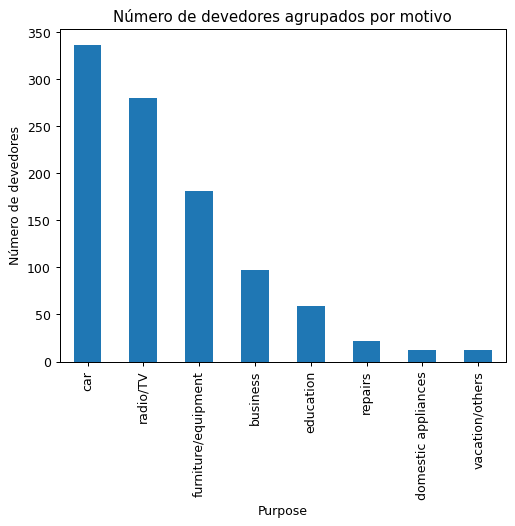

In [97]:
df_topSpecies = df['Purpose'].groupby(df['Purpose']).count().sort_values(ascending=False) 
fig = plt.figure(dpi=90)
df_topSpecies.plot.bar()

plt.title('Número de devedores agrupados por motivo')
plt.xlabel('Purpose')
plt.ylabel('Número de devedores')
plt.show()

#testar agrupamento de repais, domestic appliances, vaction/others

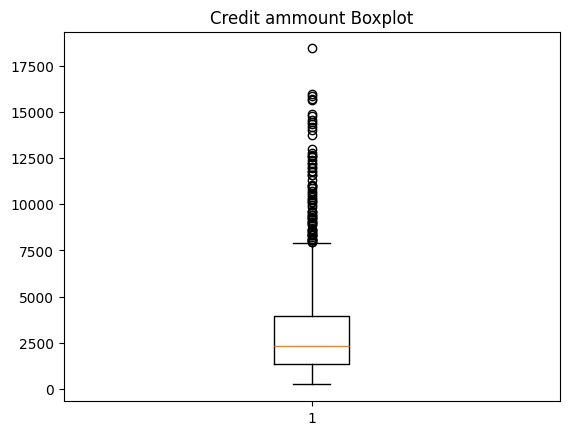

In [98]:
# Creates a boxplot
plt.boxplot(df['Credit amount']) 
plt.title('Credit ammount Boxplot') 
plt.show()

#testar eliminar esses outliers

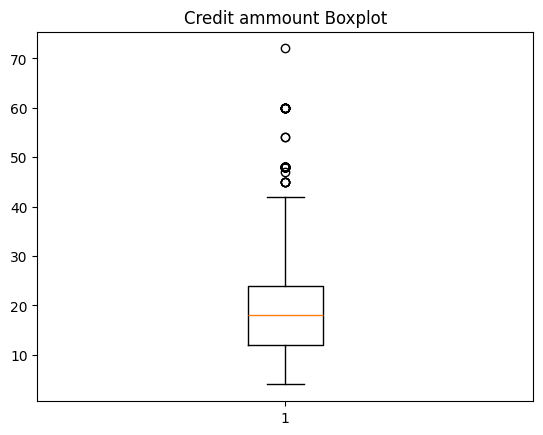

In [99]:
# Creates a boxplot
plt.boxplot(df['Duration']) 
plt.title('Credit ammount Boxplot') 
plt.show()

#testar eliminar esses outliers

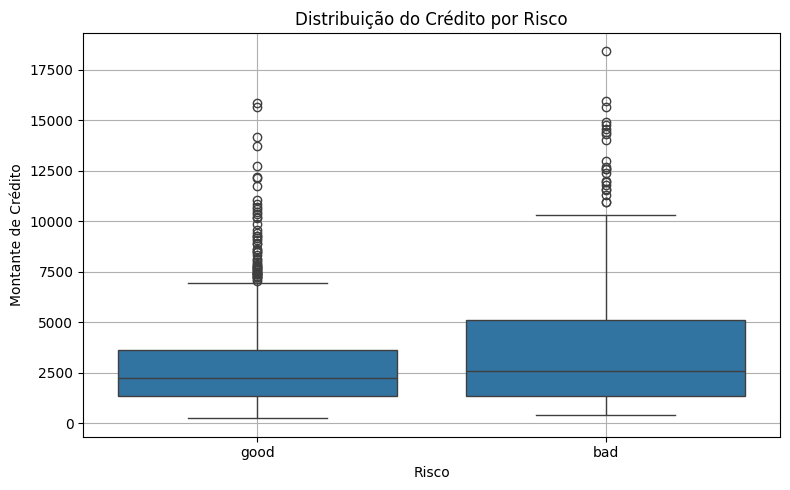

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: df com 'Credit amount' e 'Risk'
# df = pd.read_csv('seu_arquivo.csv')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Risk', y='Credit amount')
plt.title('Distribuição do Crédito por Risco')
plt.xlabel('Risco')
plt.ylabel('Montante de Crédito')
plt.grid(True)
plt.tight_layout()
plt.show()
